Output()

Output()

         mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha  33.194  2.587    28.151     38.308      0.037    0.026    4798.0   
beta1   2.479  0.019     2.443      2.516      0.000    0.000    6696.0   
beta2   9.549  0.482     8.601     10.476      0.006    0.004    6710.0   
beta3  -3.021  0.202    -3.408     -2.621      0.002    0.002    8097.0   
sigma   5.541  0.407     4.789      6.349      0.005    0.004    6393.0   

       ess_tail  r_hat  
alpha    5500.0    1.0  
beta1    5851.0    1.0  
beta2    6364.0    1.0  
beta3    6037.0    1.0  
sigma    5969.0    1.0  
Interval HDI 95% pentru beta1:: <xarray.Dataset> Size: 64B
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
Data variables:
    beta1    (hdi) float64 16B 2.443 2.516
Interval HDI 95% pentru beta2: <xarray.Dataset> Size: 64B
Dimensions:  (hdi: 2)
Coordinates:
  * hdi      (hdi) <U6 48B 'lower' 'higher'
Data variables:
    beta2    (hdi) float64 16B 8.601 10.48
Interv

array([<Axes: title={'center': 'beta1'}>,
       <Axes: title={'center': 'beta2'}>,
       <Axes: title={'center': 'beta3'}>], dtype=object)

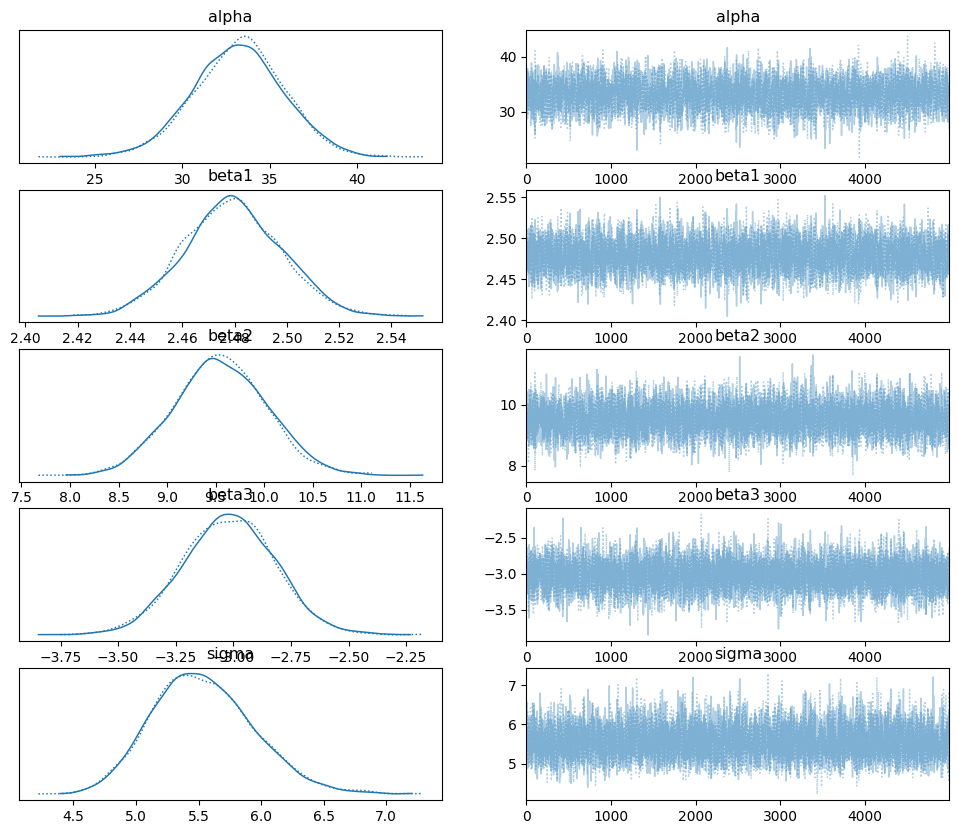

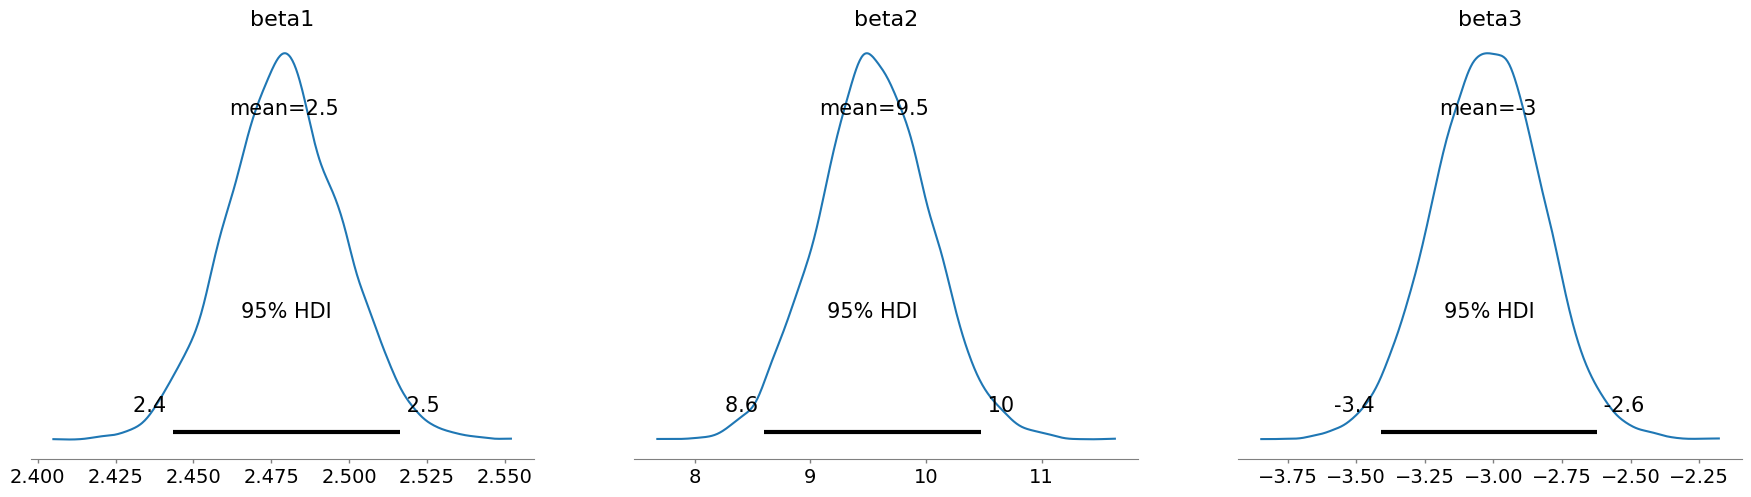

In [3]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("real_estate_data.csv")


with pm.Model() as model:
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta1 = pm.Normal("beta1", mu=0, sigma=10)  # coef pt suprafata
    beta2 = pm.Normal("beta2", mu=0, sigma=10)  # coef pt nr de camere
    beta3 = pm.Normal("beta3", mu=0, sigma=10)  # coef pt distanta
    sigma = pm.HalfNormal("sigma", sigma=10)    # dev std a preturilor

    mu = alpha + beta1 * data['Surface_area'] + beta2 * data['Rooms'] + beta3 * data['Distance_to_center'] # modelul de regresie cu alpha + beta1 * x1 + beta2 * x2 + beta3 * x3

    price_obs = pm.Normal("price_obs", mu=mu, sigma=sigma, observed=data['Price'])

    trace = pm.sample(5000, return_inferencedata=True, random_seed=42)

    summary = az.summary(trace, hdi_prob=0.95)
az.plot_trace(trace)
print(summary)

hdi_beta1 = az.hdi(trace, var_names=["beta1"], hdi_prob=0.95)
hdi_beta2 = az.hdi(trace, var_names=["beta2"], hdi_prob=0.95)
hdi_beta3 = az.hdi(trace, var_names=["beta3"], hdi_prob=0.95)

print("Interval HDI 95% pentru beta1::", hdi_beta1)
print("Interval HDI 95% pentru beta2:", hdi_beta2)
print("Interval HDI 95% pentru beta3:", hdi_beta3)

# grafic posterior pt coeficienti
az.plot_posterior(trace, var_names=["beta1", "beta2", "beta3"], hdi_prob=0.95)

